### Explore meteorological data

In [1]:
import os
import zipfile
import pandas as pd
import glob
import keplergl
import geopandas as gpd
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import re
import numpy as np
from pyproj import Proj

In [2]:
# Drive folder with original data: https://drive.google.com/drive/folders/1me2IpDY3om6IRKv_WMT5W6Qw0r9DI74C

In [3]:
os.listdir('data')

['.DS_Store',
 'Estaciones_meteorologicas.csv',
 '02-HGPT-MT-06.- Estacion Baños-20210426T162523Z-001.zip',
 'Inventario Estaciones Meteo.xls',
 '02-HGPT-MT-06.- Estacion Baños']

In [4]:
### Read a sheet from an excel file
file = glob.glob('data/*.xls')[0]
sheets = pd.read_excel(file, None)
list(sheets.keys())
df = pd.read_excel(io=file, sheet_name=list(sheets.keys())[0], engine ='xlrd',skiprows = 1)

In [5]:
df = pd.read_csv('data/Estaciones_meteorologicas.csv')
df.head()

,fuente,numero,codigo,nombre,tipo,provincia,estado,fecha_instalacion,latitud,longitud,parametros_medicion
0,esta_inamhi,1,M0029,BAÑOS,CP,TUNGURAHUA,FUNCIONANDO,20-jun-62,12329.0,782505.0,"Temperatura Max, temperatura Min, Temperatura,..."
1,esta_inamhi,2,M0258,QUEROCHACA(UTA),CP,TUNGURAHUA,FUNCIONANDO,2-nov-85,12202.0,783620.0,"Temperatura Max, temperatura Min, Temperatura,..."
2,esta_inamhi,3,M1069,CALAMACA CONVENIO INAMHI HCPT,CP,TUNGURAHUA,FUNCIONANDO,4-jul-88,11634.0,784908.0,"Temperatura Max, temperatura Min, Temperatura,..."
3,esta_inamhi,4,M0126,PATATE,CO,TUNGURAHUA,FUNCIONANDO,1-may-63,11801.0,783000.0,"Temperatura Max, temperatura Min, Temperatura,..."
4,esta_inamhi,5,M0127,PILLARO,CO,TUNGURAHUA,FUNCIONANDO,1-Dec-63,11010.0,783310.0,"Temperatura Max, temperatura Min, Temperatura,..."


In [17]:
myProj = Proj("+proj=utm +zone=17S, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [18]:
lon, lat = myProj(df['longitud'].values, df['latitud'].values, inverse=True)

In [21]:
lon

array([-78.46203009, -78.45201988, -78.44045693, -78.45758644,
       -78.45480388, -78.45171471, -78.44541252, -78.44897653,
       -78.4688712 , -78.45633813, -78.45262241, -19.42934026,
       -17.22465419, -15.76969217, -15.76969217, -19.05039204,
       -18.61256189, -17.10057497, -20.11372178, -20.81104732,
       -19.31796305, -18.50098482, -21.81322966, -15.55097746,
       -12.87258391, -18.23847411,          inf, -20.90950484,
       -17.96268711, -19.90939236, -19.42934026, -17.22465419,
       -15.76969217, -15.76969217, -19.05039204, -18.61256189,
       -17.10057497, -20.11372178, -20.81104732, -19.31796305,
       -18.50098482, -21.81322966, -15.55097746, -12.87258391,
       -18.23847411,          inf, -20.90950484, -17.96268711,
       -19.90939236])

In [ ]:
### There is a problem with the coordinates. I can extract the coordinates from ESTA_INAMHI but not form the other 2. UTM format

In [39]:
df_inamhi = df[df['fuente']== 'esta_inamhi']
df_inamhi.latitud = -df_inamhi.latitud/1e4
df_inamhi.longitud = -df_inamhi.longitud/1e4

In [40]:
gdf = gpd.GeoDataFrame(
    df_inamhi, geometry=gpd.points_from_xy(df_inamhi.longitud, df_inamhi.latitud))

In [53]:
gdf = gdf.set_crs(epsg=4326)

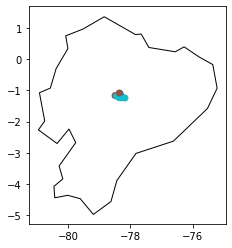

In [56]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
SA = world.query('name == "Ecuador"')
gdf4326 = gdf.to_crs(world.crs)

fig, ax = plt.subplots()
ax.set_aspect('equal')
SA.plot(ax=ax, color='white', edgecolor='black')
gdf4326.plot(ax=ax, column='tipo',figsize=(20,20))

plt.show()

#### Automate data extraction from Drive downloads

In [2]:
path = '/Users/tamarahuete/Documents/Github_repos/TFM21/data'
#ziplist = glob.glob(f'{path}/*.zip')
ziplist = glob.glob('data/*.zip')

In [3]:
zip = zipfile.ZipFile(f'{ziplist[0]}')
zip.namelist()[0:5]

['02-HGPT-MT-06.- Estacion Baños/2013-10-14/Banios_5min_20140116_subir.csv',
 '02-HGPT-MT-06.- Estacion Baños/2016-07-28/BANIOS_5MIN_20160728_subir.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-10-14/Banios_5min_20140116.csv',
 '02-HGPT-MT-06.- Estacion Baños/2015-02-06/8310_5min_20150211__.csv',
 '02-HGPT-MT-06.- Estacion Baños/2016-07-28/BANIOS_5MIN_20160728___.csv']

In [4]:
#order ziplist by date
a = []
for i in range(len(zip.namelist())):
    date_str = zip.namelist()[i].split('/')[1]
    try:
        date_date = datetime.strptime(date_str, '%Y-%m-%d')
    except:
        print(f'{date_str} is not a date')
    a.append(date_date)

00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date
00_RESUMEN_1MIN_02 is not a date


In [5]:
# get unique values
unique_dates = list(set(a))
# order by date
unique_dates.sort()
unique_dates
#convert back to string
str_dates = []
for l in range(len(unique_dates)):
    str_dates.append(unique_dates[l].strftime('%Y-%m-%d'))
str_dates

['2013-03-21',
 '2013-05-09',
 '2013-06-13',
 '2013-07-31',
 '2013-10-04',
 '2013-10-14',
 '2014-05-08',
 '2014-07-24',
 '2014-11-25',
 '2015-02-06',
 '2015-05-13',
 '2015-07-08',
 '2015-10-07',
 '2016-01-14',
 '2016-04-11',
 '2016-07-28',
 '2016-08-24',
 '2017-01-12',
 '2017-08-16',
 '2018-01-08',
 '2018-03-21',
 '2018-05-02',
 '2018-06-14',
 '2018-08-16',
 '2019-01-18',
 '2019-06-20',
 '2019-09-28',
 '2020-01-08']

In [6]:
## Reorder files
files_by_date = []
for dates in str_dates:
    #r = re.compile(f'.*/{dates}/.*') # all files (including excel sheets)
    r = re.compile(f'.*/{dates}/.*.csv') # only csv files
    newlist = list(filter(r.match, zip.namelist())) 
    files_by_date.extend(newlist)

In [7]:
files_by_date

['02-HGPT-MT-06.- Estacion Baños/2013-03-21/8310_1min_20170717.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-05-09/8310_1min_20170717.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-05-09/BAÑOS_1hora_20130326.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-06-13/8310_5min_20200203.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-06-13/8310_1min_20170717.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-07-31/8310_1min_20170717.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-07-31/8310_5min_20200203.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-10-04/8310_1min_20170717.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-10-04/Banos_5min_20130619.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-10-14/Banios_5min_20140116_subir.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-10-14/Banios_5min_20140116.csv',
 '02-HGPT-MT-06.- Estacion Baños/2013-10-14/8310_1min_20170717.csv',
 '02-HGPT-MT-06.- Estacion Baños/2014-05-08/Banos_5min_20131231_subir.csv',
 '02-HGPT-MT-06.- Estacion Baños/2014-05-08/Banos_5min_20140514_subi

In [125]:
def read_meteo_csv(zf, file): 
    try:
        df = pd.read_csv(zf.open(file),header=None, encoding = 'latin-1')
        print('Success regular csv, no header, latin encoding')
    except:
        try:
            df = pd.read_csv(zf.open(file), sep = ';', encoding = 'latin-1')
            if len(df.columns) == 1:
                df = df[df.columns[0]].str.split(',',expand=True)
                df = df.iloc[1:]
            print('Success sep ";", latin encoding')
        except:
            print('Failed')
    
    ## Detect and elminate empty columns- incluiding columns with low number of values (<1% of file)
    df = df.replace('', np.nan)
    empty_cols = [col for col in df.columns if df[col].isnull().all() or round(df[col].isnull().value_counts()[0]/len(df[col]),2) < 0.01]
    df.drop(empty_cols,
        axis=1,
        inplace=True)
    if len(df.columns)==5:
        df.columns = ['Date', 'Time','Variable', 'Value','type']
    return df #print(f'file ={i}, cols = {len(df.columns)}')

TypeError: wide_to_long() missing 2 required positional arguments: 'i' and 'j'

In [ ]:
def wide_to_long(df):
    

In [ ]:
file =12, cols = 10
file =32, cols = 5
file =61, cols = 14

In [ ]:
df = pd.read_csv(zf.open(file), sep = ';', encoding = 'latin-1')

In [37]:
#10 cols
zf = zipfile.ZipFile(f'{ziplist[0]}')
df = read_meteo_csv(zf, files_by_date[12])
df.head(2)

Success sep ";", latin encoding


,Fecha,Temperatura,T Max,T Min,Humedad R,H_R Max,H_M Min,Precipitacion,Direccion,Velocidad
0,15/10/2013 10:25:00,"17,88","17,93","17,83","85,18","85,44","84,88","0,00","86,74","1,92"
1,15/10/2013 10:30:00,"17,89","17,94","17,86","85,19","85,84","84,60","0,00","132,13","2,27"


In [127]:
# 8 cols
df = read_meteo_csv(zf, files_by_date[61])
df.head(2)

Success sep ";", latin encoding


,Fecha,AT5minAvg,AT5minMax,AT5minMin,RH5minAvg,RH5minMax,RH5minMin,TB5minAcc,WD5minAvg,WD5minMax,WD5minMin,WS5minAvg,WS5minMax,WS5minMin
0,16/08/2017 11:25:00,"19,95","20,1","19,82","74,37","76,14","73,15","0,4","78,17","85,17","67,19","3,82","4,47","2,82"
1,16/08/2017 11:30:00,"19,68","19,81","19,57","76,06","76,85","74,9","3,5","85,34","93,78","79,97","3,66","4,08","3,23"


In [126]:
# 14 cols
df = read_meteo_csv(zf, files_by_date[0])
df.head(2)

Success regular csv, no header, latin encoding


,Date,Time,Variable,Value,type
0,03/14/2013,22:27:00,TB1minAcc,0.0,G
1,03/14/2013,22:27:00,ATAvg,17.3,G


In [124]:
len(df.columns)

5

In [52]:
df[df.columns[2]].unique()

array(['TB1minAcc', 'ATAvg', 'RHAvg', 'WDAvg', 'WSAvg'], dtype=object)

In [ ]:
zf = zipfile.ZipFile(f'{ziplist[0]}')
for i in range(0,len(files_by_date)):
    read_meteo_csv(zf,files_by_date[i])

Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Failed
Success sep ";", latin encoding
Failed
Success sep ";", latin encoding


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/Users/tamarahuete/opt/anaconda3/lib/python3.7/abc.py", line 139, in __instancecheck__
    return _abc_instancecheck(cls, instance)
KeyboardInterrupt: 


Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding
Success sep ";", latin encoding


In [20]:
i

84

In [21]:
len(files_by_date)

85

In [39]:
df[['date','time','var','value','blank','letter']] = df['Station Name'].str.split(',',expand=True)
df

ValueError: shape mismatch: value array of shape (126635,) could not be broadcast to indexing result of shape (6,126635)

In [10]:
files_by_date[3]

'02-HGPT-MT-06.- Estacion Baños/2013-06-13/8310_5min_20200203.csv'

In [16]:
df =pd.read_csv(zf.open(files_by_date[3]), sep = ';', encoding = 'latin-1')
df = df['Station Name'].str.split(',',expand=True)
df.iloc[1:]

,0,1,2,3,4,5
1,05/09/2013,16:50:00,TB5minAcc,0.80,,G
2,05/09/2013,16:50:00,AT5minAvg,18.77,,G
3,05/09/2013,16:50:00,AT5minMin,18.75,,G
4,05/09/2013,16:50:00,AT5minMax,18.80,,G
5,05/09/2013,16:50:00,RH5minAvg,80.52,,G
...,...,...,...,...,...,...
126630,06/12/2013,12:30:00,WS5minMin,3.36,,G
126631,06/12/2013,12:30:00,WD5minMin,-135.72,,G
126632,06/12/2013,12:30:00,WS5minMax,6.83,,G
126633,06/12/2013,12:30:00,WD5minMax,-124.38,,G


In [228]:
csv.Sniffer(df.iloc[0])

TypeError: __init__() takes 1 positional argument but 2 were given

In [269]:
with open(f'data/{files_by_date[3]}', newline='', encoding = 'latin-1') as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read(1024))
    print(dialect.delimiter)
df = pd.read_csv(f'data/{files_by_date[3]}', encoding='latin-1',sep = dialect.delimiter, skiprows=1)


8310    05/09/2013,16:50:00,AT5minAvg,18.77,,G
Name: 1, dtype: object

In [282]:
with open(f'data/{files_by_date[3]}', 'rb') as f:
    lines = [f.readlines()]
    np.loadtxt(lines[0][2], dtype='str').shape[1]

TypeError: expected string or bytes-like object

In [294]:
lines[0][2].strip().decode("utf-8").split(',')

['05/09/2013', '16:50:00', 'TB5minAcc', '0.80', '', 'G']

In [306]:
pd.read_fwf(f'data/{files_by_date[3]}', 
                 dialect = dialect, 
                 names=['date', 'time', 'variable', 'value', 'empty','type'])

,date,time,variable,value,empty,type
0,Station Name,NaN,NaN,NaN,NaN,NaN
1,8310,NaN,NaN,NaN,NaN,NaN
2,"05/09/2013,16:50:00,TB5minAcc,0.80,,G",NaN,NaN,NaN,NaN,NaN
3,"05/09/2013,16:50:00,AT5minAvg,18.77,,G",NaN,NaN,NaN,NaN,NaN
4,"05/09/2013,16:50:00,AT5minMin,18.75,,G",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
126631,"06/12/2013,12:30:00,WS5minMin,3.36,,G",NaN,NaN,NaN,NaN,NaN
126632,"06/12/2013,12:30:00,WD5minMin,-135.72,,G",NaN,NaN,NaN,NaN,NaN
126633,"06/12/2013,12:30:00,WS5minMax,6.83,,G",NaN,NaN,NaN,NaN,NaN
126634,"06/12/2013,12:30:00,WD5minMax,-124.38,,G",NaN,NaN,NaN,NaN,NaN
